In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from ocatari.vision.utils import mark_bb

In [2]:
import time

In [3]:
start = time.time()
df = pd.read_pickle(
    "../data/datasets/ALE/Kangaroo_dqn_agent_rgb.pkl.gz", compression="gzip"
)
end = time.time()
print(f"Loading RGB dataframe: in {end - start:.2f}s")
start = time.time()
df_dqn = pd.read_pickle(
    "../data/datasets/ALE/Kangaroo_dqn_agent_dqn.pkl.gz", compression="gzip"
)
end = time.time()
print(f"Loading DQN dataframe: in {end - start:.2f}s")

Loading RGB dataframe: in 2.66s
Loading DQN dataframe: in 0.42s


In [4]:
df.columns

Index(['index', 'obs', 'next_obs', 'objects', 'next_objects', 'action',
       'reward', 'original_reward', 'done'],
      dtype='object')

Frame  100 : [Child at (117, 12), (8, 15), Fruit at (39, 84), (7, 11), Fruit at (59, 60), (7, 11), Bell at (93, 36), (6, 11), Platform at (16, 172), (128, 4), Platform at (16, 28), (128, 4), Ladder at (132, 132), (8, 35), Platform at (16, 76), (128, 4), Ladder at (20, 85), (8, 35), Platform at (16, 124), (128, 4), Ladder at (132, 37), (8, 35)]
Frame  120 : [Player at (50, 52), (8, 24), Child at (121, 12), (8, 15), Fruit at (39, 84), (7, 11), Platform at (16, 172), (128, 4), Platform at (16, 28), (128, 4), Ladder at (132, 132), (8, 35), Platform at (16, 76), (128, 4), Ladder at (20, 85), (8, 35), Platform at (16, 124), (128, 4), Ladder at (132, 37), (8, 35)]
Frame  140 : [Child at (125, 12), (8, 15), Fruit at (39, 84), (7, 11), Bell at (93, 36), (6, 11), Platform at (16, 172), (128, 4), Platform at (16, 28), (128, 4), Ladder at (132, 132), (8, 35), Platform at (16, 76), (128, 4), Ladder at (20, 85), (8, 35), Platform at (16, 124), (128, 4), Ladder at (132, 37), (8, 35)]
Frame  160 : [Pl

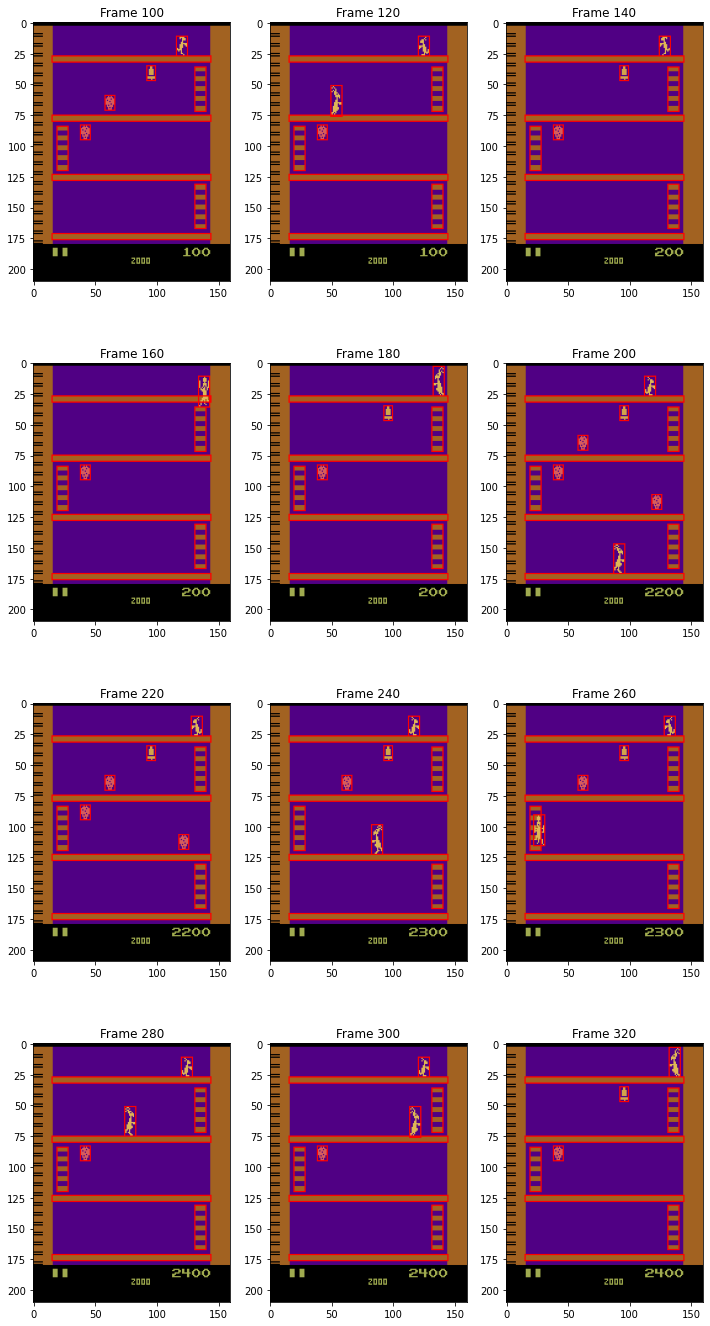

In [12]:
grid = (4, 3)
fig, axes = plt.subplots(*grid, figsize=(4 * grid[1], 6 * grid[0]))
for i, ax in enumerate(axes.flatten()):
    array = df["obs"][100 + 20 * i].cpu().numpy()
    for obj in df["objects"][100 + 20 * i]:
        mark_bb(array, obj.xywh, color=(255, 0, 0))
    ax.imshow(array.astype(np.uint8))
    ax.set_title(f"Frame {100+20*i}")
    print("Frame ", 100 + 20 * i, ":", df["objects"][100 + 20 * i])

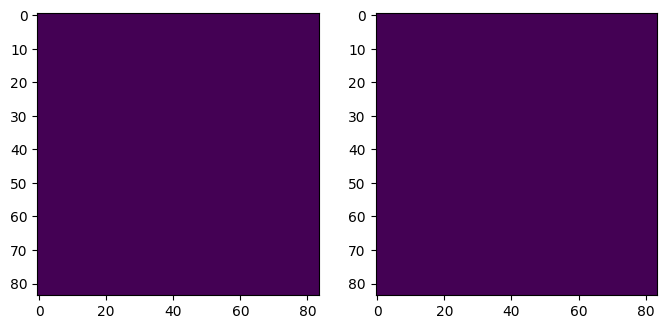

In [ ]:
grid = (1, 2)
fig, axes = plt.subplots(*grid, figsize=(4 * grid[1], 6 * grid[0]))
for i, ax in enumerate(axes.flatten()):
    array = df_dqn["obs_dqn"][1000 + 1 * i].cpu().numpy()
    ax.imshow(array.astype(np.uint8)[-1])

In [ ]:
df["objects"][1000]

[Player at (136, 116), (8, 24),
 Life at (16, 183), (4, 7),
 Life at (24, 183), (4, 7),
 Child at (125, 12), (8, 15),
 Bell at (93, 36), (6, 11),
 Fruit at (59, 60), (7, 11),
 Fruit at (39, 84), (7, 11),
 Fruit at (119, 108), (7, 11),
 Platform at (16, 172), (128, 4),
 Platform at (16, 28), (128, 4),
 Platform at (16, 76), (128, 4),
 Platform at (16, 124), (128, 4),
 Time at (80, 191), (15, 5),
 Ladder at (132, 132), (8, 36),
 Ladder at (20, 84), (8, 36),
 Ladder at (132, 36), (8, 36)]

In [ ]:
df["action"][1000]

12.0

In [ ]:
df["reward"][1000]

0.0

In [ ]:
df["original_reward"][1000]

0.0

In [ ]:
df["done"][1000]

False